Download housing.xlsx file. This is a real-life dataset consisting of housing sales prices in the city of
Windsor, Ontario, Canada. You can find a description of the variables on housing.txt file. Our target variable is ‘price’.

NOTE: Do not use any open-source algorithm for gradient decent method. Instead, you need to write gradient descent method with ridge or lasso regularization from scratch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Housing.csv')

In [ ]:
data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


In [ ]:
data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


Dropped the columns for my understanding and working only on the lotsize and the price

In [ ]:
columns_to_drop = ['bedrooms', 'bathrms', 'stories', 'garagepl',
                   'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
data = data.drop(columns_to_drop, axis=1)

In [ ]:
data.head()

,price,lotsize
0,42000,5850
1,38500,4000
2,49500,3060
3,60500,6650
4,61000,6360


Used this formula for the polynomial: y=a
0
​
 +a 1
​
 x+a 2
​
 x^2
 +a 3
​
 x^3
 +a 4
​
 x^4
 +a 5
​
 x^5

polynomial function of degree 5, where X[Lotsize] is raised to the powers 1, 2, 3, 4, and 5, and each term is multiplied by its respective coefficient.

In [ ]:
data['lotsize_2'] = data['lotsize'] ** 2


In [ ]:
data['lotsize_3'] = data['lotsize'] ** 3


In [ ]:
data['lotsize_4'] = data['lotsize'] ** 4


In [ ]:
data['lotsize_5'] = data['lotsize'] ** 5

In [ ]:
print(data)

      price  lotsize  lotsize_2     lotsize_3         lotsize_4  \
0     42000     5850   34222500  200201625000  1171179506250000   
1     38500     4000   16000000   64000000000   256000000000000   
2     49500     3060    9363600   28652616000    87677004960000   
3     60500     6650   44222500  294079625000  1955629506250000   
4     61000     6360   40449600  257259456000  1636170140160000   
..      ...      ...        ...           ...               ...   
541   91500     4800   23040000  110592000000   530841600000000   
542   94000     6000   36000000  216000000000  1296000000000000   
543  103000     6000   36000000  216000000000  1296000000000000   
544  105000     6000   36000000  216000000000  1296000000000000   
545  105000     6000   36000000  216000000000  1296000000000000   

               lotsize_5  
0    6851400111562500000  
1    1024000000000000000  
2     268291635177600000  
3   -5441807857147051616  
4   -8040701982291951616  
..                   ...  
541  2

In [ ]:
data.head()

,price,lotsize,lotsize_2,lotsize_3,lotsize_4,lotsize_5
0,42000,5850,34222500,200201625000,1171179506250000,6851400111562500000
1,38500,4000,16000000,64000000000,256000000000000,1024000000000000000
2,49500,3060,9363600,28652616000,87677004960000,268291635177600000
3,60500,6650,44222500,294079625000,1955629506250000,-5441807857147051616
4,61000,6360,40449600,257259456000,1636170140160000,-8040701982291951616


Refered the lecture notes to split_train_test

In [ ]:
import numpy as np
def split_train_test(X, test_ratio):
  np.random.seed(123)
  shuffled_indices = np.random.permutation(len(X))
  test_set_size = int(len(X)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return X.iloc[train_indices], X.iloc[test_indices]

In [ ]:
train_values, test_values = split_train_test(data, 0.3)

In [ ]:
train_values.shape

(383, 6)

In [ ]:
test_values.shape

(163, 6)

In [ ]:
X_train = train_values[['lotsize', 'lotsize_2', 'lotsize_3', 'lotsize_4', 'lotsize_5']]
X_test = test_values[['lotsize', 'lotsize_2', 'lotsize_3', 'lotsize_4', 'lotsize_5']]

In [ ]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [ ]:
y_train = train_values[['price']]
y_test = test_values[['price']]

During the polynomial transformation step, the 'lotsize_2', 'lotsize_3', 'lotsize_4', and 'lotsize_5' columns were likely created from the original 'lotsize' feature. These columns were included in the normalization process alongside the features generated from the 'lotsize' column. To ensure that these polynomial features have the same scale as the original 'lotsize' feature, it is recommended to standardize their values.

In [ ]:
for col in ['lotsize', 'lotsize_2', 'lotsize_3', 'lotsize_4', 'lotsize_5']:
    X_test.loc[:, col] = (X_test[col] - np.mean(X_train[col])) / X_train[col].std()
    X_train.loc[:, col] = (X_train[col] - np.mean(X_train[col])) / X_train[col].std()

<ipython-input-21-5e40ad719867>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, col] = (X_test[col] - np.mean(X_train[col])) / X_train[col].std()
<ipython-input-21-5e40ad719867>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, col] = (X_train[col] - np.mean(X_train[col])) / X_train[col].std()


In [ ]:
X_train

,lotsize,lotsize_2,lotsize_3,lotsize_4,lotsize_5
332,0.921293,0.659564,0.362615,0.136030,0.502767
248,-0.758289,-0.631312,-0.467162,-0.331144,-0.125074
298,0.092409,-0.091986,-0.188367,-0.207586,0.959869
148,-0.191157,-0.297874,-0.308518,-0.266886,0.387337
120,-0.365659,-0.411595,-0.368043,-0.293217,0.159637
...,...,...,...,...,...
98,-0.758289,-0.631312,-0.467162,-0.331144,-0.125074
322,1.313923,1.093436,0.747879,0.425287,0.077438
382,3.473385,4.374592,4.820623,4.766844,-1.545453
365,3.473385,4.374592,4.820623,4.766844,-1.545453


In [ ]:
X_test

,lotsize,lotsize_2,lotsize_3,lotsize_4,lotsize_5
421,-0.044575,-0.194706,-0.250212,-0.239044,0.647166
263,-0.522711,-0.505490,-0.413128,-0.311513,0.014506
35,-0.322034,-0.384092,-0.354124,-0.287268,0.209317
48,-0.121356,-0.249616,-0.281736,-0.254331,0.502327
151,-0.976416,-0.731746,-0.504353,-0.342799,-0.196565
...,...,...,...,...,...
328,0.768604,0.504356,0.235954,0.048711,-0.673492
202,-0.767014,-0.635626,-0.468874,-0.331718,-0.128832
0,0.266911,0.047694,-0.098586,-0.158826,1.477442
142,-0.322034,-0.384092,-0.354124,-0.287268,0.209317


In [ ]:
y_train

,price
332,50000
248,44500
298,52900
148,80000
120,61500
...,...
98,35000
322,93000
382,140000
365,99000


In [ ]:
y_test

,price
421,80000
263,48900
35,61000
48,48000
151,35500
...,...
328,115442
202,50000
0,42000
142,51000


To include a bias term in the dataset, a column of 1s is added to the start of the X_train and X_test DataFrames using these codes: X_train.insert(loc=0, column='ones', value=1) and X_test.insert(loc=0, column='ones', value=1). These ones are called bias terms. It serves as an intercept in the linear model

In [ ]:
X_train.insert(loc=0, column='ones', value=1)
X_test.insert(loc=0, column='ones', value=1)

In [ ]:
X_train

,ones,lotsize,lotsize_2,lotsize_3,lotsize_4,lotsize_5
332,1,0.921293,0.659564,0.362615,0.136030,0.502767
248,1,-0.758289,-0.631312,-0.467162,-0.331144,-0.125074
298,1,0.092409,-0.091986,-0.188367,-0.207586,0.959869
148,1,-0.191157,-0.297874,-0.308518,-0.266886,0.387337
120,1,-0.365659,-0.411595,-0.368043,-0.293217,0.159637
...,...,...,...,...,...,...
98,1,-0.758289,-0.631312,-0.467162,-0.331144,-0.125074
322,1,1.313923,1.093436,0.747879,0.425287,0.077438
382,1,3.473385,4.374592,4.820623,4.766844,-1.545453
365,1,3.473385,4.374592,4.820623,4.766844,-1.545453


To perform ridge regression using gradient descent, evaluate different 'lambda' values that are stored in the 'Lambda' list. For each 'lambda' value, we run 'ridge_gradient_descent' and store the produced weights in 'W_weights'. We then calculate the RMSE on the test set for each 'lambda' value.

The most effective 'lambda' value is the one that reduces the RMSE. The script displays this optimal value of the lambda, weights and the test RMSE.

In [ ]:
learning_rate = 0.01
num_iter = 100000
def ridge_gradient_descent(X_train, y_train, num_iter, learning_rate, Lambda):
    num_rows, num_cols = X_train.shape
    weights = np.random.randn(num_cols)
    for i in range(num_iter):
        # Calculate the predicted values
        y_hat = np.dot(X_train, weights)
        # Calculate the error
        errors = y_hat - y_train
        # Calculate the gradient of the cost function with respect to weights
        gradient = (2/ num_rows) * np.dot(X_train.T, errors) + 2 * Lambda * np.hstack(([0], weights[1:]))
        # Update the weights using the gradients
        weights -= learning_rate * gradient
    return weights

Lambda = [0.1, 0.5, 1, 5, 10]
test_rmses = []
W_weights = []

for l in Lambda:
    weights = ridge_gradient_descent(X_train.values, y_train.values.flatten(), num_iter, learning_rate, l)
    W_weights.append(weights)
    y_hat = np.dot(X_test.values, weights)
    rmse = np.sqrt(np.mean((y_test.values.flatten() - y_hat) ** 2))
    test_rmses.append(rmse)

optimal_lambda = Lambda[np.argmin(test_rmses)]
optimal_weights = W_weights[np.argmin(test_rmses)]
print("Optimal weights for lambda", optimal_lambda, ":", optimal_weights)
print("Optimal lambda:", optimal_lambda)
print("Test RMSE of optimal lambda:", test_rmses[np.argmin(test_rmses)])

Optimal weights for lambda 0.1 : [68847.91122715 12874.57243893  4331.81430526 -1635.64281916
 -3668.24917891   310.47710395]
Optimal lambda: 0.1
Test RMSE of optimal lambda: 21138.51107141816


Plot weight coefficients with the different L2 penalty value, λ.

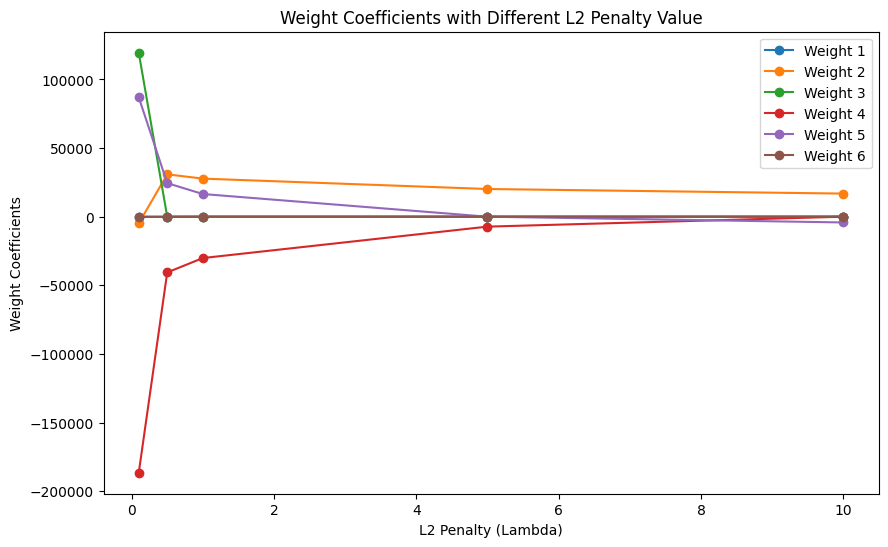

In [ ]:
weight_values = np.array(W_weights)
plt.figure(figsize=(10, 6))
for i in range(1, weight_values.shape[1]):
    plt.plot(Lambda, weight_values[:, i], marker='o', label=f'Weight {i}')
plt.xlabel('L2 Penalty (Lambda)')
plt.ylabel('Weight Coefficients')
plt.title('Weight Coefficients with Different L2 Penalty Value')
plt.legend()
plt.show()


plot ‘price’ vs ‘lotsize’

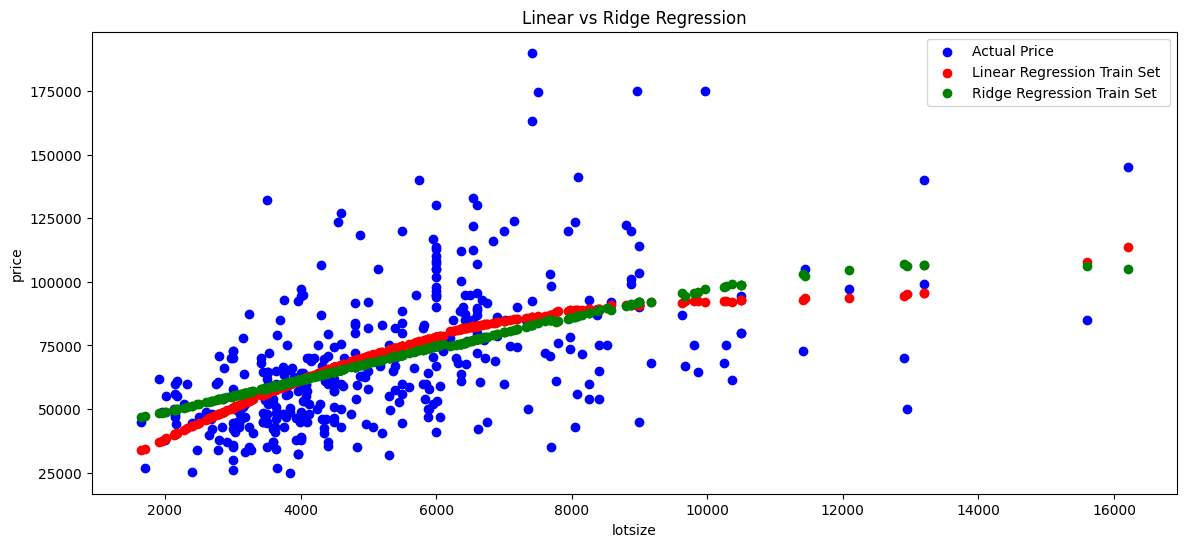

In [ ]:
optimal_ridge_weights = ridge_gradient_descent(X_train.values, y_train.values.flatten(), num_iter, learning_rate, optimal_lambda)
linear_reg_weights = ridge_gradient_descent(X_train.values, y_train.values.flatten(), num_iter, learning_rate, 0)
optimal_ridge_pred = np.dot(X_train.values, optimal_ridge_weights)
lin_reg_pred = np.dot(X_train.values, linear_reg_weights)
plt.figure(figsize=(14, 6))
plt.scatter(X_train_original[['lotsize']], y_train, color='blue', label='Actual Price')
plt.scatter(X_train_original[['lotsize']], lin_reg_pred, color='red', label='Linear Regression Train Set ')
plt.scatter(X_train_original[['lotsize']], optimal_ridge_pred, color='green', label='Ridge Regression Train Set')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('Linear vs Ridge Regression')
plt.legend()
plt.show()

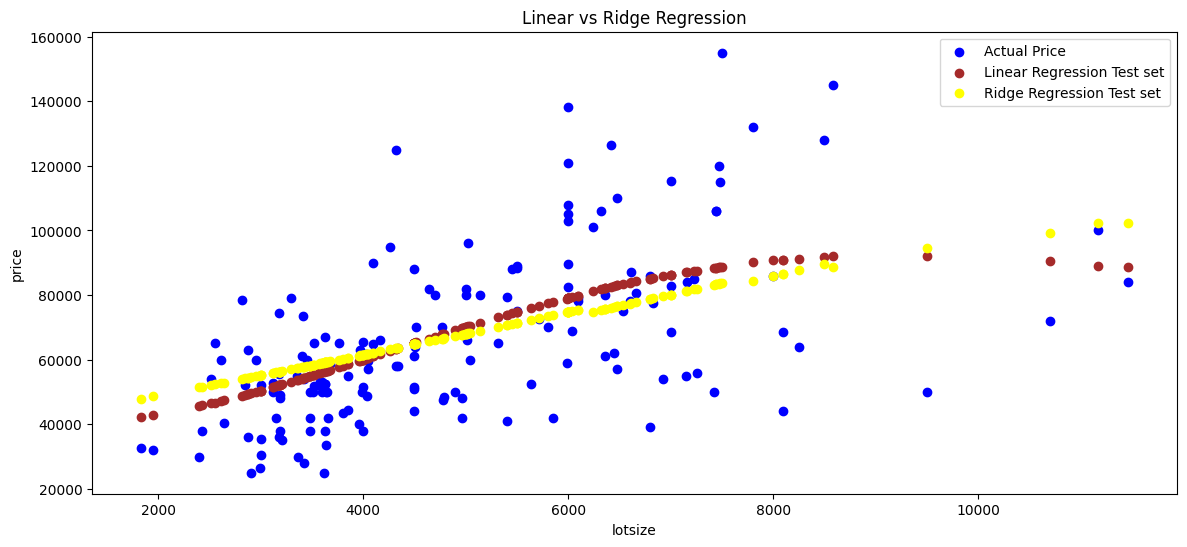

In [ ]:
optimal_ridge_weights = ridge_gradient_descent(X_train.values, y_train.values.flatten(), num_iter, learning_rate, optimal_lambda)
linear_reg_weights = ridge_gradient_descent(X_train.values, y_train.values.flatten(), num_iter, learning_rate, 0)
optimal_ridge_pred = np.dot(X_test.values, optimal_ridge_weights)
lin_reg_pred = np.dot(X_test.values, linear_reg_weights)
plt.figure(figsize=(14, 6))
plt.scatter(X_test_original[['lotsize']], y_test, color='blue', label='Actual Price')
plt.scatter(X_test_original[['lotsize']], lin_reg_pred, color='brown', label='Linear Regression Test set')
plt.scatter(X_test_original[['lotsize']], optimal_ridge_pred, color='yellow', label='Ridge Regression Test set')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('Linear vs Ridge Regression')
plt.legend()
plt.show()

** Fit the training data using 5th order polynomial regression model and Lasso (L1 penalty) regularization.**

**You need to try at least 5 different L1 penalty (for example, λ = 0.1, 0.5, 1, 5, 10).**

**Search optimum L1 penalty, λ based on Root Mean Squared Error (RMSE) of train/test data.**
**Plot weight coefficients with the different L1 penalty value, λ.**

**Please fit the train/test data using the Linear regression model with and without the optimum L1 regularization (Please plot ‘price’ vs ‘lotsize’).**
**Print out the optimized weight values based on the optimum L1 penalty value, λ.**

**Print out Root Mean Squared Error (RMSE) for training/ test data based on the optimum L1 penalty value, λ.**


The implementation of Lasso Regression involves using gradient descent to iteratively update the weights and determine the ideal values for the regression coefficients. Lasso Regression differs from Ridge Regression by using L1 regularization term which makes some coefficients zero, hence performing feature selection.

In [ ]:
learning_rate = 0.01
num_iter = 100000

def lasso_gradient_descent(X_train, y_train, num_iter, learning_rate, Lambda):
    num_rows, num_cols = X_train.shape
    weights = np.random.randn(num_cols)
    for i in range(num_iter):
        # Calculate the predicted values
        y_hat = np.dot(X_train, weights)
        # Calculate the error
        errors = y_hat - y_train
        # Calculate the gradient of the cost function with respect to weights
        lambda_weights = np.full_like(weights[1:], Lambda)
        weights -= learning_rate * (2 / num_rows) * np.dot(X_train.T, errors) + np.concatenate(([0], lambda_weights * np.sign(weights[1:])))
    return weights

Lambda = [0.1, 0.5, 1, 5, 10]
test_rmses = []
W2_weights = []

# Convert y_train and y_test to NumPy arrays
y_train_array = y_train.values.flatten()
y_test_array = y_test.values.flatten()

for l in Lambda:
    X_train_with_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  #updating the bias every iteration to have an accurate value and to make visualization easy for both training and testing
    X_test_with_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    weights = lasso_gradient_descent(X_train_with_bias, y_train_array, num_iter, learning_rate, l)
    W2_weights.append(weights)
    y_hat = np.dot(X_test_with_bias, weights)
    rmse = np.sqrt(np.mean((y_test_array - y_hat) ** 2))
    test_rmses.append(rmse)

optimal_lambda = Lambda[np.argmin(test_rmses)]
optimal_weights = W2_weights[np.argmin(test_rmses)]
print("Optimal weights for lambda", optimal_lambda, ":", optimal_weights)
print("Optimal lambda:", optimal_lambda)
print("Test RMSE of optimal lambda:", test_rmses[np.argmin(test_rmses)])


Optimal weights for lambda 0.1 : [ 39422.11546715  29423.29576001  30958.15341949   4856.51548253
 -51738.20174254  30900.72263825   -212.03927158]
Optimal lambda: 0.1
Test RMSE of optimal lambda: 20420.73852874381


In [ ]:
print(Lambda, test_rmses)

[0.1, 0.5, 1, 5, 10] [20420.73852874381, 20445.583757136064, 20491.99207463749, 20731.061964637614, 20930.8812841936]


Plot weight coefficients with the different L1 penalty value, λ.

Higher the iteration the graph tend to distrub the plots that is optimization of the convergence gets distrubed and the weight values cofficient changes wrt loss function.

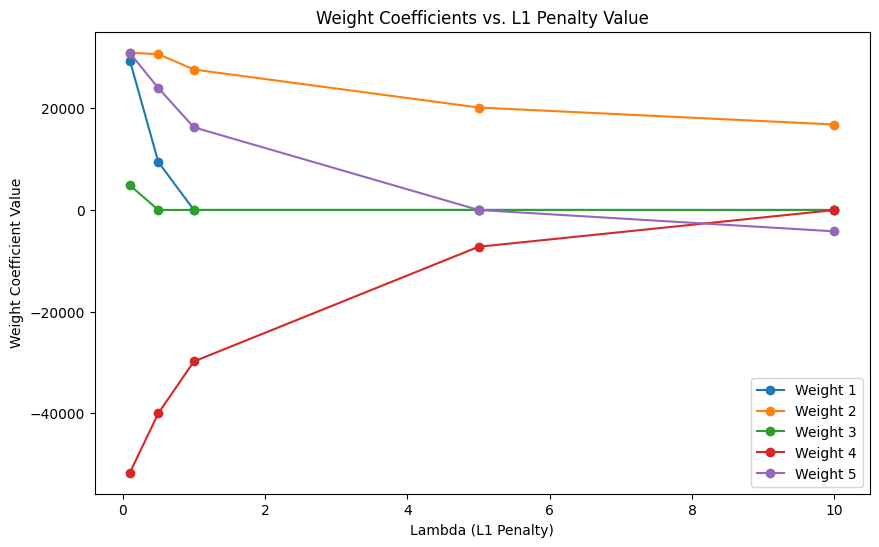

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(1, 6):
    weight_values = [W2_weights[j][i] for j in range(len(Lambda))]
    plt.plot(Lambda, weight_values, marker='o', label=f'Weight {i}')
plt.xlabel('Lambda (L1 Penalty)')
plt.ylabel('Weight Coefficient Value')
plt.title('Weight Coefficients vs. L1 Penalty Value')
plt.legend()
plt.show()

plot ‘price’ vs ‘lotsize’ higher the iteration the plots shows the distributions

Lower the iteration which might be good for one side which results in overlapping in the linear regresion and lasso regression this might in overfitting depending on the number of dataset.  

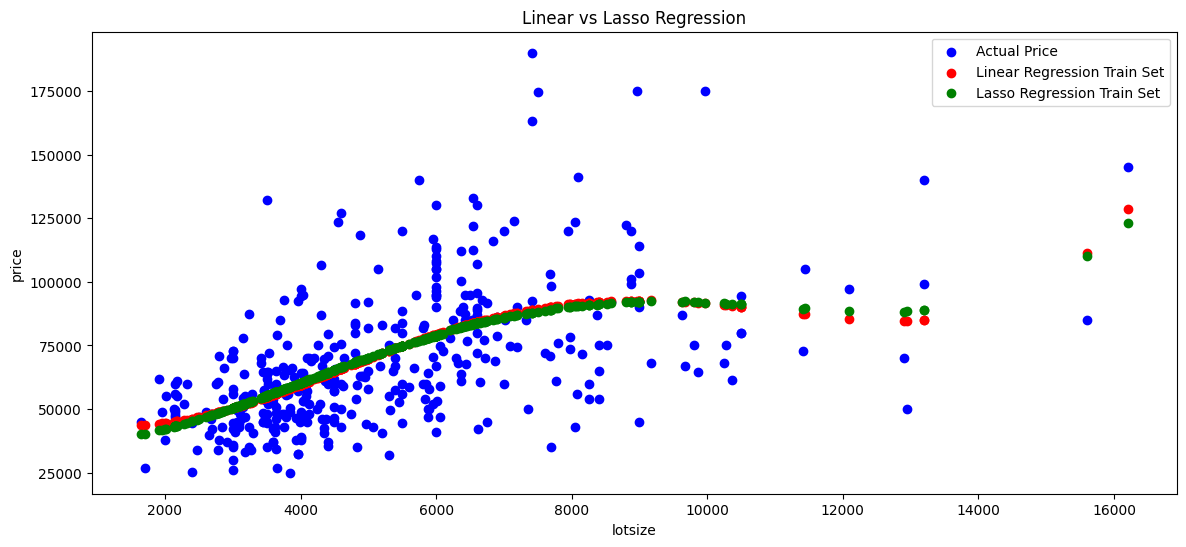

In [ ]:
optimal_lasso_weights = lasso_gradient_descent(X_train.values, y_train.values.flatten(), num_iter, learning_rate, optimal_lambda)
linear_reg_weights = lasso_gradient_descent(X_train.values, y_train.values.flatten(), num_iter, learning_rate,0)
optimal_lasso_pred = np.dot(X_train.values, optimal_lasso_weights)
lin_reg_pred = np.dot(X_train.values, linear_reg_weights)
plt.figure(figsize=(14, 6))
plt.scatter(X_train_original['lotsize'], y_train, color='blue', label='Actual Price')
plt.scatter(X_train_original['lotsize'], lin_reg_pred, color='red', label='Linear Regression Train Set')
plt.scatter(X_train_original['lotsize'], optimal_lasso_pred, color='green', label='Lasso Regression Train Set')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('Linear vs Lasso Regression')
plt.legend()
plt.show()


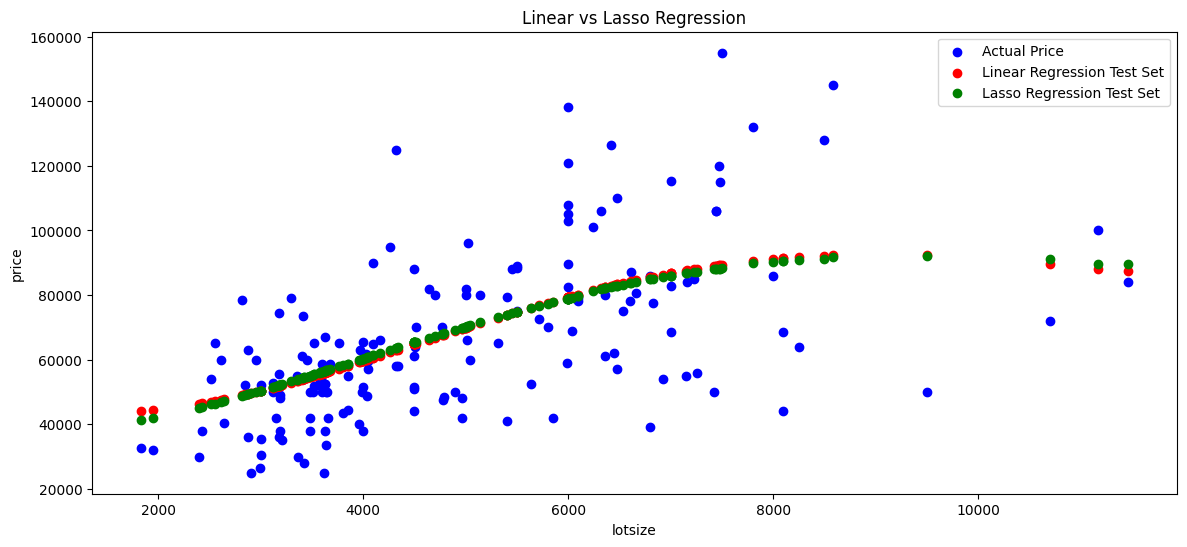

In [ ]:
optimal_lasso_weights = lasso_gradient_descent(X_train.values, y_train.values.flatten(), num_iter, learning_rate, optimal_lambda)
linear_reg_weights = lasso_gradient_descent(X_train.values, y_train.values.flatten(), num_iter, learning_rate,0)
optimal_lasso_pred = np.dot(X_test.values, optimal_lasso_weights)
lin_reg_pred = np.dot(X_test.values, linear_reg_weights)
plt.figure(figsize=(14, 6))
plt.scatter(X_test_original['lotsize'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test_original['lotsize'], lin_reg_pred, color='red', label='Linear Regression Test Set')
plt.scatter(X_test_original['lotsize'], optimal_lasso_pred, color='green', label='Lasso Regression Test Set')
plt.xlabel('lotsize')
plt.ylabel('price')
plt.title('Linear vs Lasso Regression')
plt.legend()
plt.show()
